<a href="https://colab.research.google.com/github/Sagarjain93/Operations_transaction_Data/blob/main/transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title - Operational Transaction Data Analysis**

#**1. Introduction**

This project focuses on the exploratory analysis of operational transaction data to uncover behavioral patterns, potential fraud indicators, and performance bottlenecks. The dataset comprises detailed records of digital transactions including user identifiers, transaction metadata, network characteristics (like latency and bandwidth), device information, and fraud labels. Given the integration of both financial and network-level parameters, this dataset offers a unique opportunity to analyze how operational conditions impact financial transactions, and whether they correlate with suspicious or failed activities. The aim is to derive actionable insights that can support anomaly detection, fraud prevention, and system optimization.

*Potential Hypotheses to Explore*

**Fraud Detection Hypotheses**

1.Transactions with unusually high amounts have a higher chance of being fraudulent.

2.Fraudulent transactions are more likely to be initiated from mobile or unknown devices.

3.Transactions with higher latency or low bandwidth are more prone to fraud.

**Behavioral/Usage Patterns**

1.Users typically interact with a fixed set of counterparties (receiver accounts).

2.Certain PIN codes (locations) show higher transaction volumes or fraud rates.

**Network Impact Hypotheses**

1.Higher network latency is associated with increased transaction failures.

2.Specific Network Slice IDs are more commonly associated with failed or delayed transactions.

**Temporal Trends**

1.Fraudulent activity peaks during specific hours of the day or days of the week.

2.Transaction volume is higher during business hours and lower on weekends.

**Geolocation Hypotheses**

1.Certain geolocations (based on latitude/longitude or PIN code) are hotspots for fraud.

2.Distance between sender and receiver accounts correlates with fraud probability.

#**2. Data Description**

This dataset contains transactional records from an operational system, capturing various attributes related to digital money transfers.

**Transaction ID:** Unique identifier for each transaction.

**Sender Account ID:** ID of the account initiating the transaction.

**Receiver Account ID:** ID of the account receiving the funds.

**Transaction Amount:** Monetary value involved in the transaction.

**Transaction Type:** Type/category of the transaction (e.g., transfer, withdrawal, deposit).

**Timestamp:** Date and time when the transaction occurred.

**Transaction Status:** Status of the transaction (e.g., success, failed, pending).

**Fraud Flag:** Binary indicator (1 = fraudulent, 0 = genuine).

**Geolocation (Latitude/Longitude):** Coordinates of the transaction origin.

**Device Used:** Device type used to perform the transaction (e.g., mobile, desktop).

**Network Slice ID:** ID of the network slice allocated during the transaction (5G context).

**Latency (ms):** Network latency experienced during the transaction.

**Slice Bandwidth (Mbps):** Bandwidth available via the assigned network slice.

**PIN Code:** Postal code of the user’s location during the transaction.

#**3. Import Libraries**

In [5]:
#Data Manipulation Libraries
import pandas as pd
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Set Consistent theme for all plots
sns.set_theme(style="whitegrid")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**4. Load Dataset**


To begin the analysis, the marketing dataset is loaded directly from Google Drive. This approach ensures convenient access to the data stored in the cloud, especially when working in collaborative or cloud-based environments like Google Colab. By mounting Google Drive or using a shareable link, we can seamlessly import the dataset into our workspace for further processing and analysis.

In [7]:
df = pd.read_csv('/content/drive/MyDrive/colab/eda/8. Operations/transaction_data.csv')

In [8]:
df.columns


Index(['Transaction ID', 'Sender Account ID', 'Receiver Account ID',
       'Transaction Amount', 'Transaction Type', 'Timestamp',
       'Transaction Status', 'Fraud Flag', 'Geolocation (Latitude/Longitude)',
       'Device Used', 'Network Slice ID', 'Latency (ms)',
       'Slice Bandwidth (Mbps)', 'PIN Code'],
      dtype='object')

#**5. Inital Data Inspection**

To gain a foundational understanding of the dataset, we begin with an initial inspection that covers several essential aspects. This includes previewing the first few records to get a sense of the structure and values, examining the data types of each feature to ensure they align with expectations, and reviewing the overall shape and completeness of the dataset. We also generate statistical summaries for both numerical and categorical features to identify distributions, detect potential anomalies, and guide further steps in the analysis pipeline.

###**5.1 Preview 1st Few Records**

In [9]:
# Show First 5 rows of the data set
df.head()

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),PIN Code
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,2025-01-17 10:14:00,Failed,True,"34.0522 N, -74.006 W",Desktop,Slice3,10,179,3075
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,"35.6895 N, -118.2437 W",Mobile,Slice2,11,89,2369
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,"48.8566 N, 2.3522 W",Mobile,Slice1,4,53,8039
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,2025-01-17 10:56:00,Success,True,"34.0522 N, -74.006 W",Mobile,Slice3,10,127,6374
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,2025-01-17 10:25:00,Success,True,"55.7558 N, 37.6173 W",Mobile,Slice3,20,191,8375


###**5.2 Check the Dataset Shape**

In [10]:
df.shape

(1000, 14)

**Interpretation** - *The Dataset has 1000 rows and 14 columns*

### **5.3 Dataset Summary Overview**

Check for missing values and data types of each column.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
 10  Network Slice ID                  1000 non-null   object 
 11  Latency (ms)                      1000 non-null   int64  
 12  Slice B

**Interpretation:** From the output, we see all columns have 1000 non-null values. The data types look correct, with latency,slice bandwidth,pincode as integers and categorical columns as objects. This suggests minimal to no missing data that we may need to handle before analysis.

###**5.4. Statistical Summary of Numeric Columns**

Generating statistical summary of numerical columns to understand their distribution, central tendency, and spread across the dataset.

In [12]:
df.select_dtypes(include='number').describe()

,Transaction Amount,Latency (ms),Slice Bandwidth (Mbps),PIN Code
count,1000.00000,1000.000000,1000.00000,1000.00000
mean,771.16529,11.688000,148.51100,5458.66600
std,411.01925,5.131958,57.78634,2603.03646
min,51.89000,3.000000,50.00000,1000.00000
25%,423.34750,7.000000,98.00000,3281.75000
50%,761.65500,12.000000,148.00000,5385.50000
75%,1122.67250,16.000000,198.25000,7535.00000
max,1497.76000,20.000000,250.00000,9999.00000


###**5.5. Statistical Summary of Category Columns**

Generating summary of categorical features to understand unique values, frequency distribution, and potential data quality issues.

In [13]:
df.select_dtypes(include='object').describe()

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Type,Timestamp,Transaction Status,Geolocation (Latitude/Longitude),Device Used,Network Slice ID
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,994,994,3,60,2,36,2,3
top,TXN3992032184,ACC71245,ACC36934,Transfer,2025-01-17 10:55:00,Failed,"48.8566 N, 139.6917 W",Mobile,Slice2
freq,1,2,2,374,28,513,42,521,340


#**6. Data Cleaning And Preprocessing**

In this section, we focus on identifying and handling issues such as missing values, incorrect data types, duplicates, and inconsistent entries. Effective data cleaning ensures the dataset is accurate, complete, and ready for reliable analysis.



##**6.1 Fix Data Types**

In [14]:
df.dtypes

,0
Transaction ID,object
Sender Account ID,object
Receiver Account ID,object
Transaction Amount,float64
Transaction Type,object
Timestamp,object
Transaction Status,object
Fraud Flag,bool
Geolocation (Latitude/Longitude),object
Device Used,object


**Interpretation** - *The datatype of timestamp column needs to be converted to datetime datatype*

In [15]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


##**6.2 Handling Missing Values**

Identifying and addressing missing values to ensure data completeness and reliability for accurate analysis.

In [16]:
df.isnull().sum()

,0
Transaction ID,0
Sender Account ID,0
Receiver Account ID,0
Transaction Amount,0
Transaction Type,0
Timestamp,0
Transaction Status,0
Fraud Flag,0
Geolocation (Latitude/Longitude),0
Device Used,0


**Interpretation** - *There are no null values in the dataset*

##**6.3 Handling Duplicate Records**

In [17]:
df.duplicated().sum()

np.int64(0)

**Interpretation** - * There are no duplicate values in the datasset*

##**6.4 Standardize Column Name**

Standardizing column names to ensure consistency, readability, and ease of use throughout the analysis.

In [18]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [19]:
df.columns

Index(['transaction_id', 'sender_account_id', 'receiver_account_id',
       'transaction_amount', 'transaction_type', 'timestamp',
       'transaction_status', 'fraud_flag', 'geolocation_(latitude/longitude)',
       'device_used', 'network_slice_id', 'latency_(ms)',
       'slice_bandwidth_(mbps)', 'pin_code'],
      dtype='object')

##**6.5 Identify Numerical And Categorical Columns**

Identifying numerical and categorical columns to guide appropriate analysis, visualization, and preprocessing techniques.

In [20]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include='number').columns

In [21]:
# Display categorical columns
categorical_columns

Index(['transaction_id', 'sender_account_id', 'receiver_account_id',
       'transaction_type', 'transaction_status',
       'geolocation_(latitude/longitude)', 'device_used', 'network_slice_id'],
      dtype='object')

In [22]:
# Display numerical columns
numerical_columns

Index(['transaction_amount', 'latency_(ms)', 'slice_bandwidth_(mbps)',
       'pin_code'],
      dtype='object')

##**6.6 Standardize Categorical Features And Explore Unique Values**

In this section, we clean the categorical columns by standardizing text formats—removing extra spaces and ensuring consistent casing. This step is essential to avoid misleading results when analyzing unique categories. After cleaning, we explore the unique values in each categorical column to understand the feature space and identify any anomalies or inconsistencies.

### **6.6. A. Standardizing Categorical Features**

In [23]:
# Clean categorical columns: strip whitespaces and lowercase all strings
for cols in categorical_columns:
  df[cols] = df[cols].str.strip().str.lower()

### **6.6. B. Explore Unique Values in Categorical Features**

In [24]:
for col in categorical_columns:
  print(f"Unique Values in {col}:")
  print(df[col].unique())
  print("\n")

Unique Values in transaction_id:
['txn9520068950' 'txn9412011085' 'txn4407425052' 'txn2214150284'
 'txn4247571145' 'txn2515439857' 'txn2169752734' 'txn3109277527'
 'txn4541918858' 'txn4229370499' 'txn6355066290' 'txn2166128709'
 'txn8655304785' 'txn5194651812' 'txn9153984217' 'txn9743166792'
 'txn6682052855' 'txn4351744832' 'txn5897093700' 'txn5863399870'
 'txn3008400720' 'txn8954205071' 'txn8076969401' 'txn5541586171'
 'txn2415439100' 'txn4822238918' 'txn3884612815' 'txn5126223597'
 'txn7417651729' 'txn7538176865' 'txn3914566506' 'txn6302601632'
 'txn2088036535' 'txn1675844695' 'txn6661143500' 'txn3325189406'
 'txn6805586313' 'txn2113838138' 'txn2956253396' 'txn9549826715'
 'txn7131992962' 'txn2209185137' 'txn2465139688' 'txn4231576514'
 'txn6050985831' 'txn6614511449' 'txn1408798870' 'txn2483635578'
 'txn4437479248' 'txn1414294833' 'txn3244921303' 'txn4585920895'
 'txn3085164852' 'txn4215761542' 'txn2921000330' 'txn1245169622'
 'txn3864456208' 'txn2157994961' 'txn3293165874' 'txn2467

## **6.7. Outlier Detections for Numerical Features**

In this step, we investigate potential outliers in the numerical columns using boxplots. Outliers can indicate data entry errors or unusual behavior.

###**6.7.A Visualizing Outlier Through BoxPlots**

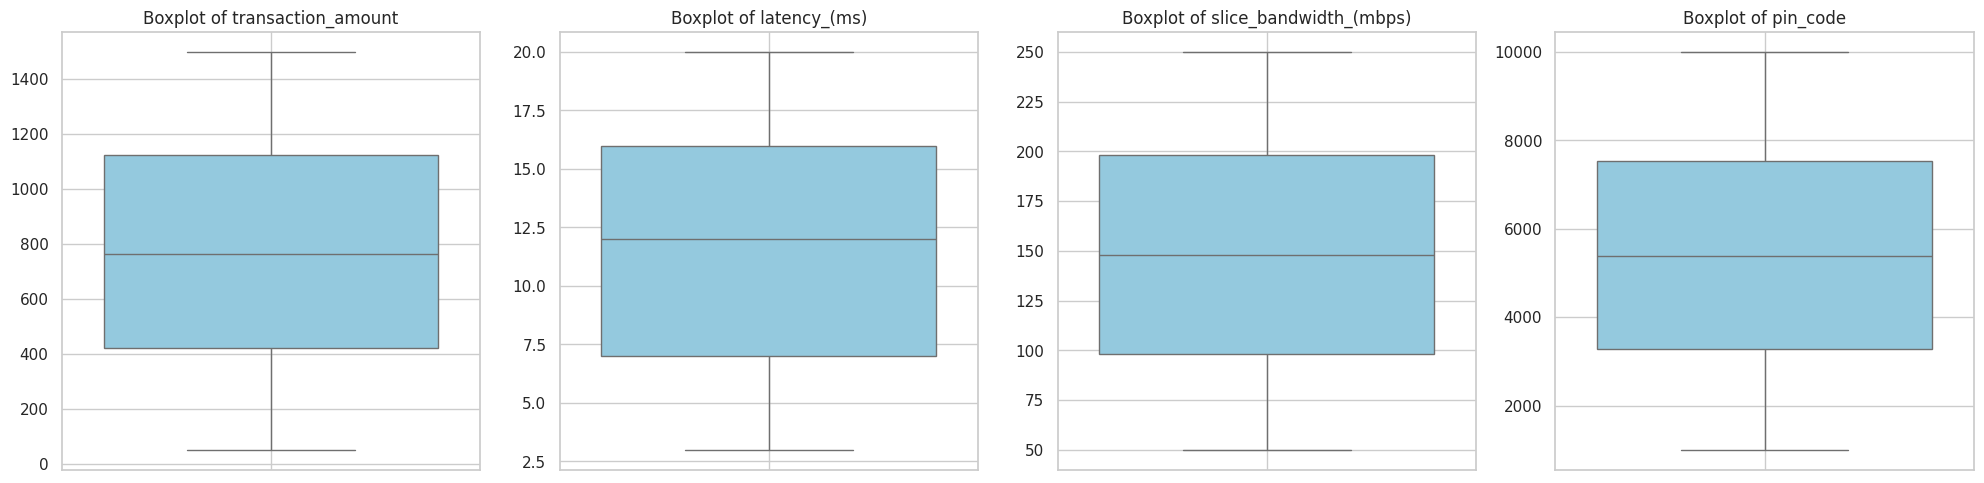

In [25]:
# Set up figure size
plt.figure(figsize=(5 * len(numerical_columns), 5))  # Dynamic width

# Loop through each numerical column and plot a boxplot
for i, col in enumerate(numerical_columns):
    # Create dynamic subplots (1 row, N columns)
    plt.subplot(1, len(numerical_columns), i + 1)

    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

**Boxplot Interpretation**

**Transaction** **Amount**

Range: ~50 to ~1500

Median: ~750

No clear outliers; distribution appears symmetric and spread out.

**Latency (ms)**

Range: ~3 to 20 ms
Median: ~12 ms
Distribution is compact; values are consistent with no outliers.

**Slice Bandwidth (Mbps)**

Range: ~50 to 250 Mbps

Median: ~150 Mbps

Values are well-distributed with no extreme variations.

**PIN Code**

Range: ~1000 to 10000

Median: ~5500

Though treated as numeric, PIN codes are categorical and not suitable for boxplot analysis.

### **6.7. B. Statistical Detection of Outliers using IQR**

In addition to visual inspection through boxplots, we use the IQR method to programmatically detect potential outliers in the numerical features. This helps in identifying the number and position of values that lie far outside the normal range and could distort our analysis.


In [26]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25%)
    Q3 = data[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1                     # Interquartile range
    lower_bound = Q1 - 1.5 * IQR      # Lower limit for non-outliers
    upper_bound = Q3 + 1.5 * IQR      # Upper limit for non-outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Loop through numerical columns and report number of outliers in each
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers detected")

transaction_amount: 0 outliers detected
latency_(ms): 0 outliers detected
slice_bandwidth_(mbps): 0 outliers detected
pin_code: 0 outliers detected


#**7. Exploratory Data Analysis - Visualization and Insights**

In this section, we use visualizations to uncover patterns, trends, and relationships within the data, helping generate meaningful insights for further analysis.

##**7.1. Univariate Analysis**
Univariate Analysis help understand the distribution and characteristics of individual variables within the dataset. In this step, we explore each feature independently to identify patterns, dominant categories, central tendency, spread, and potential anomalies.

In [27]:
df.columns


Index(['transaction_id', 'sender_account_id', 'receiver_account_id',
       'transaction_amount', 'transaction_type', 'timestamp',
       'transaction_status', 'fraud_flag', 'geolocation_(latitude/longitude)',
       'device_used', 'network_slice_id', 'latency_(ms)',
       'slice_bandwidth_(mbps)', 'pin_code'],
      dtype='object')

In [43]:
  df['pin_code'].value_counts()

,count
pin_code,
3751,3
4347,2
9631,2
5077,2
4182,2
...,...
7280,1
3460,1
5983,1


**Transaction_status  
Plot Used - Bar Plot**

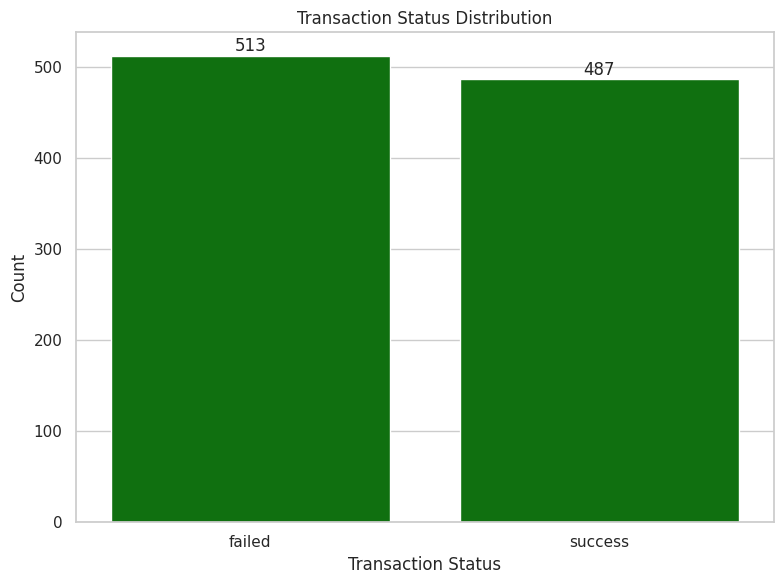

In [52]:
plt.figure(figsize=(8, 6))

# Creating a  bar plot
ax = sns.barplot(x='transaction_status', y='count', data=category_counts,color="green")

# Add values on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.5,
            int(p.get_height()), ha='center', va='bottom')

# Titles and labels
plt.title('Transaction Status Distribution')
plt.xlabel('Transaction Status')
plt.ylabel('Count')
# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Interpretation**
We observe that the out of the total transactions in the dataset which was 1000.
1. Failed Status - 513
2. Sucess Status - 487

**Fraud Flag

Plot Used - Bar Plot**

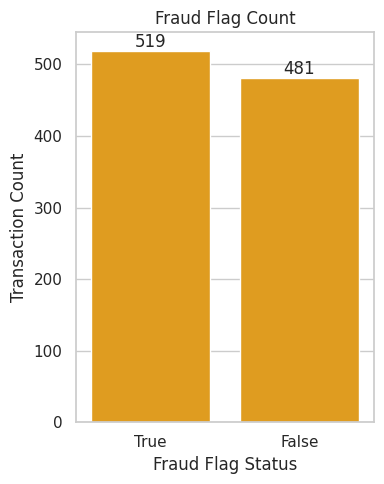

In [72]:

plt.figure(figsize=(4, 5))

# Count plot for boolean fraud_flag
ax = sns.countplot(x='fraud_flag', data=df,color="orange")

# Add values on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.5,
            int(p.get_height()),
            ha='center', va='bottom')

# Labels and title
plt.title('Fraud Flag Count')
plt.xlabel('Fraud Flag Status')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['True', 'False'])

plt.tight_layout()
plt.show()


**Interpretation** - **

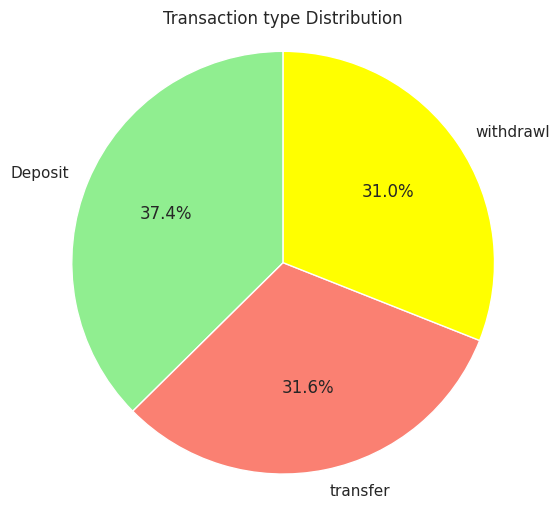

In [77]:
import matplotlib.pyplot as plt

# Count values
fraud_counts = df['transaction_type'].value_counts()

# Labels and colors
labels = ['Deposit', 'transfer','withdrawl']
colors = ['lightgreen', 'salmon','yellow']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0,0,0))
plt.title('Transaction type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()
